***Preprocessing and visualization :***

We’ll clean the dataset, normalize it, and create insightful plots.The choice of the dataset is (FD001 Dataset) of CMAPSS Jet Engine Simulated Data
(https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data)



In [32]:
# Load all important libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # Seaborn is a data visualization library built on top of matplotlib
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# Setting visualization style

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# ---------------------------------------------
# Define column names as per the dataset readme
# ---------------------------------------------
column_names = ['unit_number', 'time_in_cycles', 'operational_setting_1',
                'operational_setting_2', 'operational_setting_3']
column_names += [f'sensor{i}' for i in range(1, 22)]


# ---------------------------------------------
# Load the training dataset
# ---------------------------------------------
file_path_train = "./data/train_FD001.txt"
data_FD1 = pd.read_csv(file_path_train, header=None, names=column_names, delim_whitespace=True)
data_FD1 = data_FD1.dropna(axis=1, how="all")
#Data head for knowing what is start of all data.
data_FD1.head()

/tmp/ipykernel_266432/754391473.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_FD1 = pd.read_csv(file_path_train, header=None, names=column_names, delim_whitespace=True)


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


*** Data Cleaning & Preprocessing:***

Removing the constant and near constant values at it will little to zero effect on model but increase the complexity.As these data do not provide useful data for the model.

In [10]:
# Identify and remove constant and near constant features
# ---------------------------------------------
selector = VarianceThreshold(threshold=0.01)
selector.fit(data_FD1)
constant_features = data_FD1.columns[~selector.get_support()]
print("\nConstant features =", constant_features.tolist())

# Focus on sensor columns and drop near constant sensors for now
sensors = [f'sensor{i}' for i in range(1, 22)]
constant_sensors = set(sensors).intersection(constant_features)
print("\nConstant sensors to drop:", list(constant_sensors))

data_FD1 = data_FD1.drop(columns=constant_sensors)
print("\nRefined Training Data:\n", data_FD1.head())



Constant features = ['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor1', 'sensor5', 'sensor6', 'sensor8', 'sensor10', 'sensor13', 'sensor15', 'sensor16', 'sensor18', 'sensor19']

Constant sensors to drop: ['sensor18', 'sensor8', 'sensor15', 'sensor6', 'sensor19', 'sensor5', 'sensor10', 'sensor13', 'sensor16', 'sensor1']

Refined Training Data:
    unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3  sensor2  sensor3  sensor4  sensor7  sensor9  \
0                  100.0   641.82  1589.70  1400.60   554.36  90

**Normalize sensor data :**

Since different sensors have different scales, we apply MinMax Scaling.


Sensors for scaling: ['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor9', 'sensor11', 'sensor12', 'sensor14', 'sensor17', 'sensor20', 'sensor21']


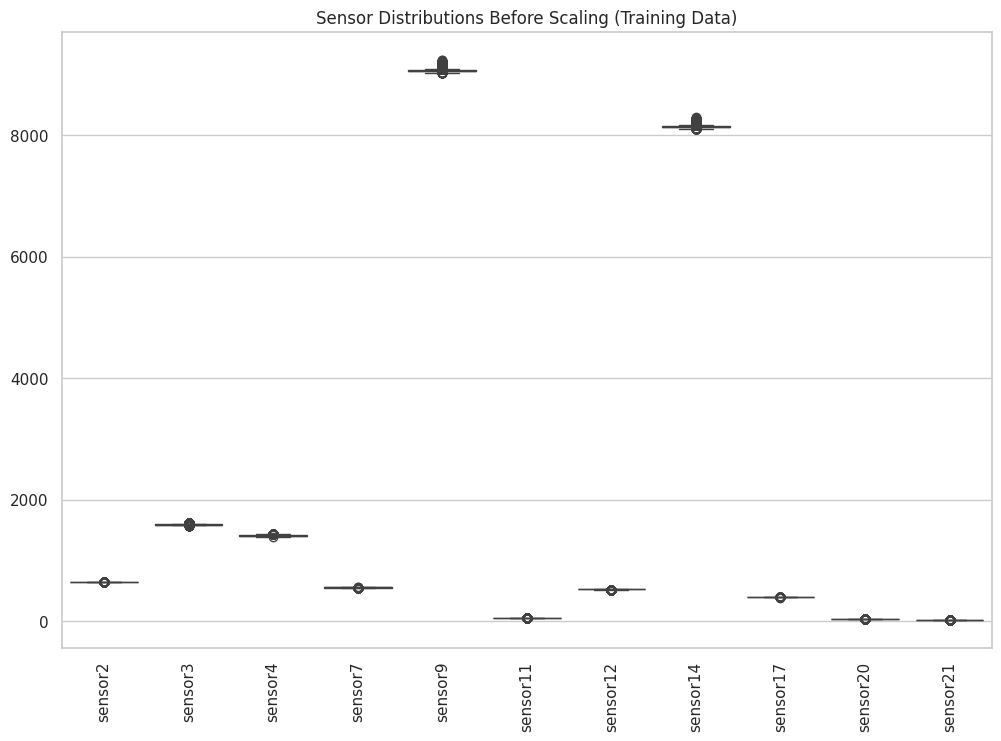


Training Data After Normalization (first 5 rows):
    unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3   sensor2   sensor3   sensor4   sensor7   sensor9  \
0                  100.0  0.183735  0.406802  0.309757  0.726248  0.109755   
1                  100.0  0.283133  0.453019  0.352633  0.628019  0.100242   
2                  100.0  0.343373  0.369523  0.370527  0.710145  0.140043   
3                  100.0  0.343373  0.256159  0.331195  0.740741  0.124518   
4                  100.0  0.349398  0.257467  0.404625  0.668277  0.149960   

In [11]:
# Normalize sensor data with MinMaxScaler
# ---------------------------------------------
scaler = MinMaxScaler()
updated_sensors = [col for col in data_FD1.columns if "sensor" in col]
print("\nSensors for scaling:", updated_sensors)

# Visualizing sensor distributions before scaling
plt.figure()
sns.boxplot(data=data_FD1[updated_sensors])
plt.xticks(rotation=90)
plt.title("Sensor Distributions Before Scaling (Training Data)")
plt.show()

data_FD1[updated_sensors] = scaler.fit_transform(data_FD1[updated_sensors])
print("\nTraining Data After Normalization (first 5 rows):\n", data_FD1.head())



Training Data with Computed RUL (first 5 rows):
    unit_number  time_in_cycles  RUL_train
0            1               1        191
1            1               2        190
2            1               3        189
3            1               4        188
4            1               5        187


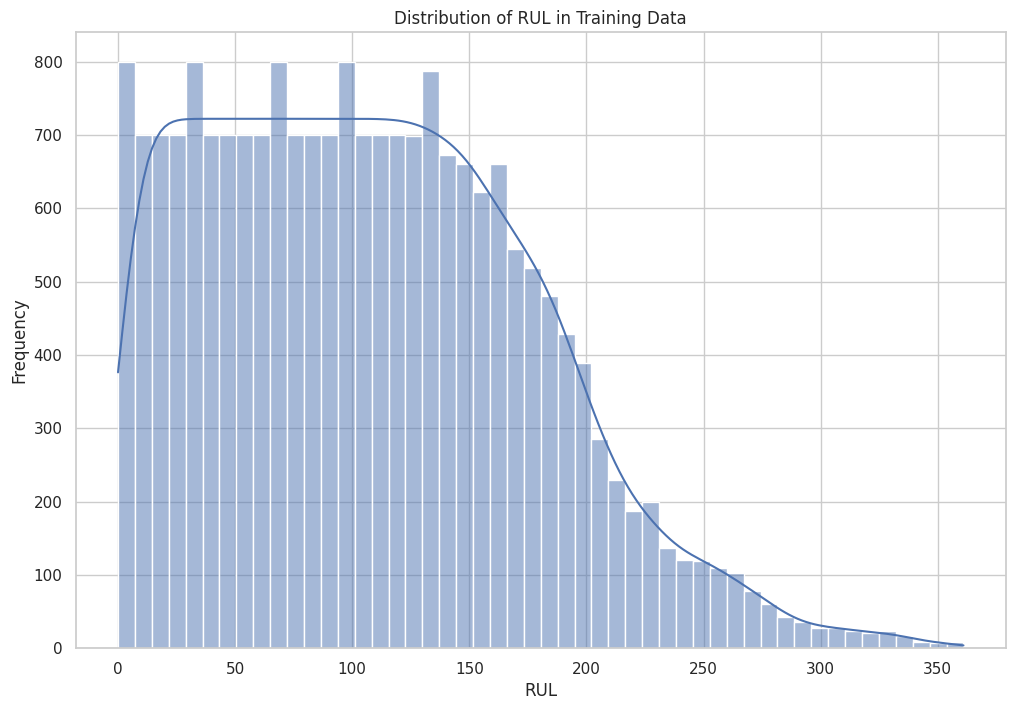

In [12]:
# Enhance: Calculate Remaining Useful Life (RUL) for Training Data
# (For each engine unit, RUL = max cycle for that unit - current cycle)
# ---------------------------------------------
max_cycle_per_unit = data_FD1.groupby('unit_number')['time_in_cycles'].transform('max')
data_FD1['RUL_train'] = max_cycle_per_unit - data_FD1['time_in_cycles']
print("\nTraining Data with Computed RUL (first 5 rows):\n",
      data_FD1[['unit_number', 'time_in_cycles', 'RUL_train']].head())

# Visualize the RUL distribution in training data
plt.figure()
sns.histplot(data_FD1['RUL_train'], bins=50, kde=True)
plt.title("Distribution of RUL in Training Data")
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Load the test dataset
# ---------------------------------------------
file_path_test = "./data/test_FD001.txt"
data_FD1_test = pd.read_csv(file_path_test, header=None, names=column_names, delim_whitespace=True)
data_FD1_test = data_FD1_test.dropna(axis=1, how="all")
print("\nTest Data Snapshot:\n", data_FD1_test.head())

# ---------------------------------------------
# Remove the same constant sensor features as in training data
# ---------------------------------------------
data_FD1_test = data_FD1_test.drop(columns=constant_sensors)
print("\nRefined Test Data:\n", data_FD1_test.head())

# Normalize test data using the scaler fitted on training data
# ---------------------------------------------
updated_sensors_test = [col for col in data_FD1_test.columns if "sensor" in col]
data_FD1_test[updated_sensors_test] = scaler.transform(data_FD1_test[updated_sensors_test])
print("\nTest Data After Normalization (first 5 rows):\n", data_FD1_test.head())

#Load the provided RUL file for Test Data
# ---------------------------------------------
# The file "RUL_FD001.txt" contains the actual RUL values for each engine in the test set.
rul_file_path = "./data/RUL_FD001.txt"  # Ensure this file is in your data module
rul_test = pd.read_csv(rul_file_path, header=None, names=['RUL_test'])
print("\nRUL Values from Provided File (first 5 rows):\n", rul_test.head())


Test Data Snapshot:
    unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor1  sensor2  sensor3  sensor4  sensor5  ...  \
0                  100.0   518.67   643.02  1585.29  1398.21    14.62  ...   
1                  100.0   518.67   641.71  1588.45  1395.42    14.62  ...   
2                  100.0   518.67   642.46  1586.94  1401.34    14.62  ...   
3                  100.0   518.67   642.44  1584.12  1406.42    14.62  ...   
4                  100.0   518.67   642.51  1587.19  1401.92    14.62  ...   

   sensor12  sensor13  senso

/tmp/ipykernel_266432/2750105063.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_FD1_test = pd.read_csv(file_path_test, header=None, names=column_names, delim_whitespace=True)


In [17]:
# Combine the Test Data with its Corresponding RUL Values
# ---------------------------------------------
# The provided RUL file has one RUL value per engine. To assign these values to each engine,
# we assume that each engine in the test set has multiple cycles. We can use groupby and then
# assign the final RUL to each engine.
# (This method assumes that the test dataset contains engines in order and the RUL file order matches.)
engine_counts = data_FD1_test.groupby('unit_number').size().reset_index(name='count')
print("\nEngine Counts in Test Data:\n", engine_counts.head())

# Map each unit to its provided RUL. Here, we repeat the RUL value for each record of that unit.
# (Ensure that the order of engines in the test set corresponds to the order in the RUL file.)
rul_list = rul_test['RUL_test'].tolist()
# Create a dictionary mapping unit_number to provided RUL. Adjust if necessary.
units = sorted(data_FD1_test['unit_number'].unique())
rul_dict = {unit: rul for unit, rul in zip(units, rul_list)}
print("\nMapping of Engine Units to Provided RUL:", rul_dict)

# Assign the provided RUL value to each row based on its unit_number
data_FD1_test['RUL_test'] = data_FD1_test['unit_number'].map(rul_dict)
print("\nTest Data with Provided RUL (first 5 rows):\n", data_FD1_test[['unit_number', 'time_in_cycles', 'RUL_test']].head())



Engine Counts in Test Data:
    unit_number  count
0            1     31
1            2     49
2            3    126
3            4    106
4            5     98

Mapping of Engine Units to Provided RUL: {np.int64(1): 112, np.int64(2): 98, np.int64(3): 69, np.int64(4): 82, np.int64(5): 91, np.int64(6): 93, np.int64(7): 91, np.int64(8): 95, np.int64(9): 111, np.int64(10): 96, np.int64(11): 97, np.int64(12): 124, np.int64(13): 95, np.int64(14): 107, np.int64(15): 83, np.int64(16): 84, np.int64(17): 50, np.int64(18): 28, np.int64(19): 87, np.int64(20): 16, np.int64(21): 57, np.int64(22): 111, np.int64(23): 113, np.int64(24): 20, np.int64(25): 145, np.int64(26): 119, np.int64(27): 66, np.int64(28): 97, np.int64(29): 90, np.int64(30): 115, np.int64(31): 8, np.int64(32): 48, np.int64(33): 106, np.int64(34): 7, np.int64(35): 11, np.int64(36): 19, np.int64(37): 21, np.int64(38): 50, np.int64(39): 142, np.int64(40): 28, np.int64(41): 18, np.int64(42): 10, np.int64(43): 59, np.int64(44): 109, np

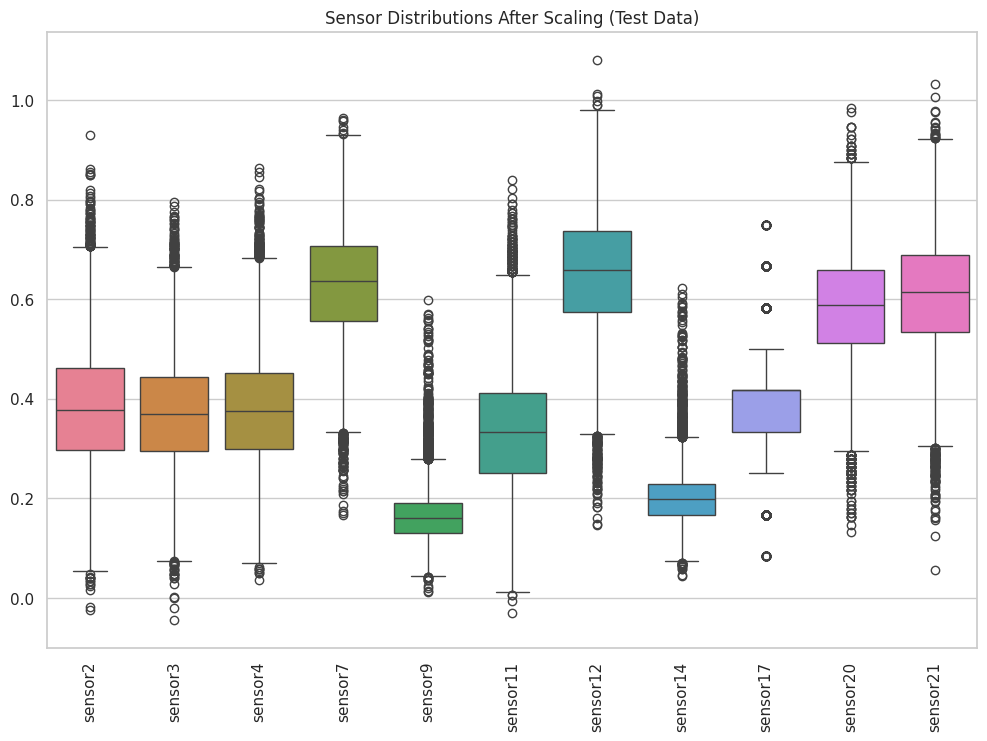

In [18]:
#Additional Visualizations for Test Data
# ---------------------------------------------
plt.figure()
sns.boxplot(data=data_FD1_test[updated_sensors_test])
plt.xticks(rotation=90)
plt.title("Sensor Distributions After Scaling (Test Data)")
plt.show()

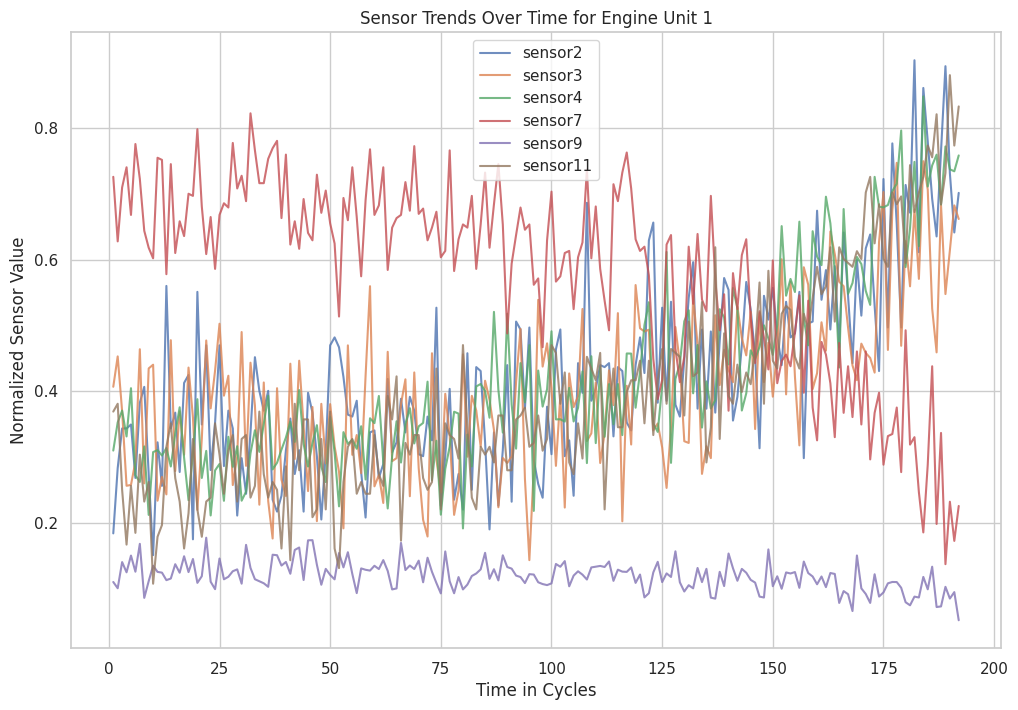

In [19]:
# Advanced Visualizations for Training and Test Data
# =======================================================

# ---------- 1. Sensor Trends Over Time for a Selected Engine Unit ----------
# Choose a specific engine unit to track its sensor trends.
selected_unit = 1
unit_data = data_FD1[data_FD1['unit_number'] == selected_unit]

plt.figure()
for sensor in updated_sensors[:6]:  # Plot first 6 sensors for clarity
    plt.plot(unit_data['time_in_cycles'], unit_data[sensor], label=sensor, alpha=0.8)
plt.xlabel("Time in Cycles")
plt.ylabel("Normalized Sensor Value")
plt.title(f"Sensor Trends Over Time for Engine Unit {selected_unit}")
plt.legend()
plt.show()


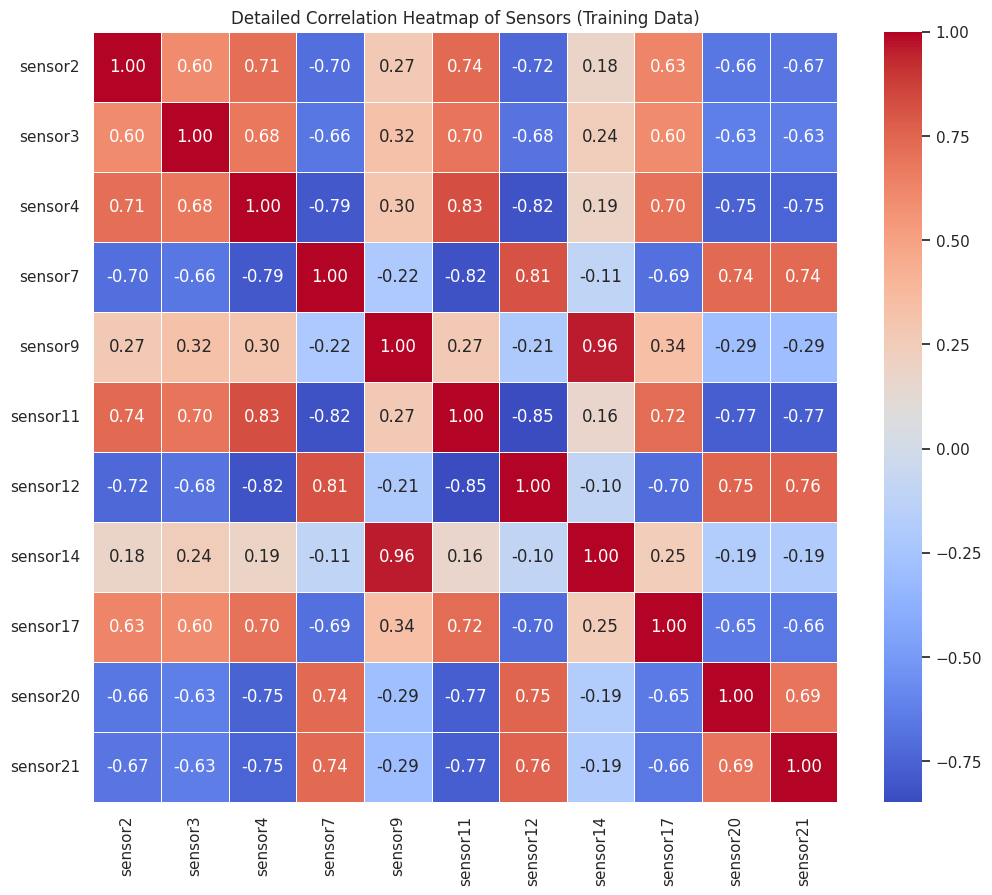

In [20]:
# ---------- 2. Detailed Correlation Heatmap with Annotations ----------
plt.figure(figsize=(12,10))
corr_matrix = data_FD1[updated_sensors].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Detailed Correlation Heatmap of Sensors (Training Data)")
plt.show()


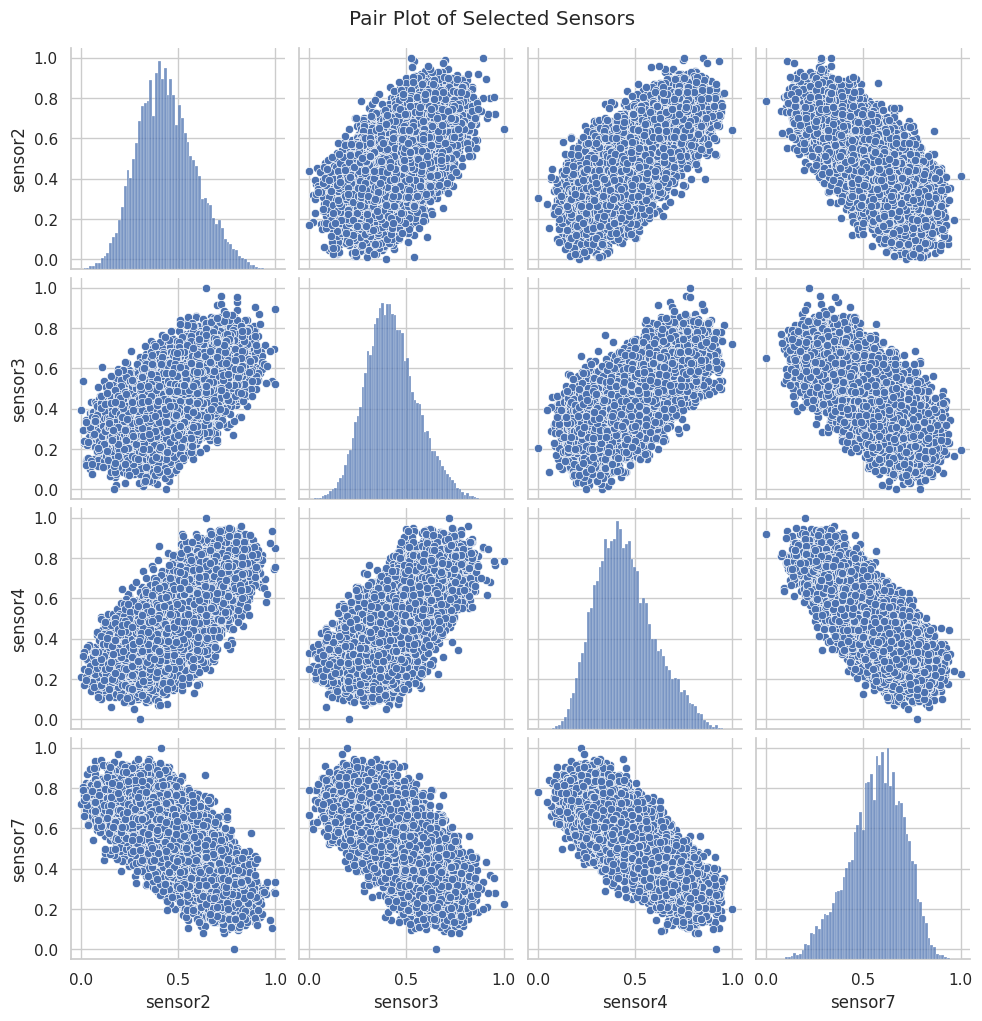

In [21]:
# ---------- 3. Pair Plot for a Subset of Sensors ----------
# Using seaborn's pairplot to visualize pairwise relationships.
subset_sensors = updated_sensors[:4]  # choose first 4 sensors for readability
sns.pairplot(data_FD1[subset_sensors])
plt.suptitle("Pair Plot of Selected Sensors", y=1.02)
plt.show()


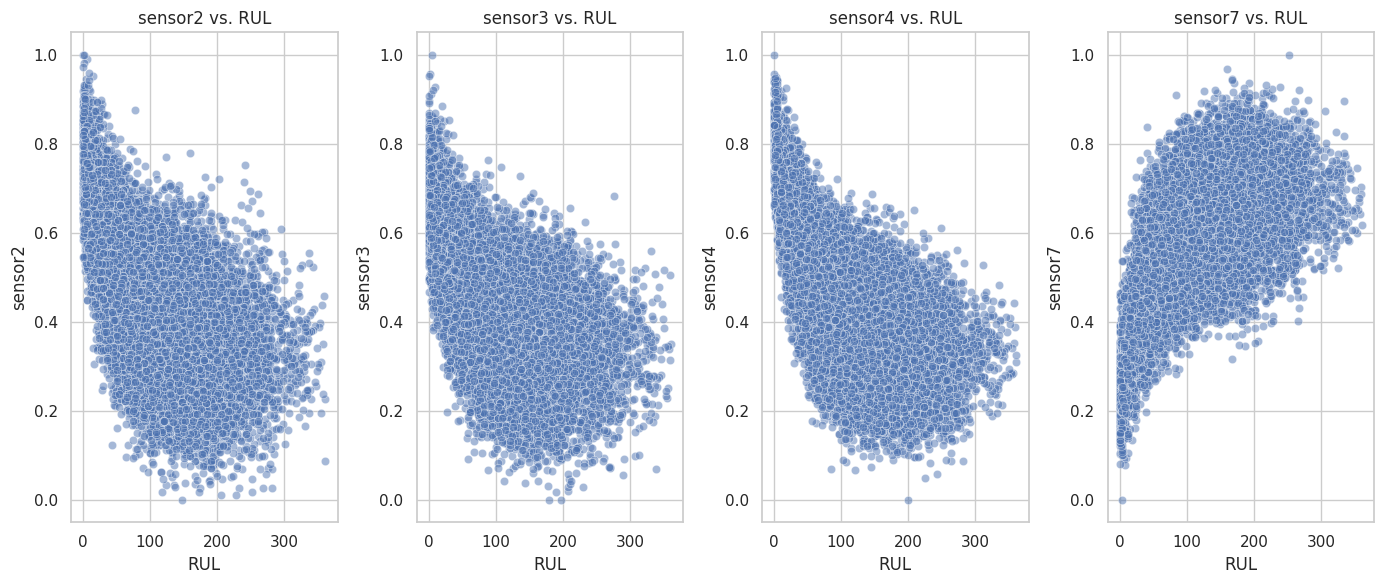

In [22]:
# ---------- 4. RUL vs. Sensor Scatter Plots ----------
# Visualize how sensor readings relate to RUL in training data.
plt.figure(figsize=(14,6))
for i, sensor in enumerate(updated_sensors[:4]):  # first 4 sensors for example
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=data_FD1['RUL_train'], y=data_FD1[sensor], alpha=0.5)
    plt.xlabel("RUL")
    plt.ylabel(sensor)
    plt.title(f"{sensor} vs. RUL")
plt.tight_layout()
plt.show()

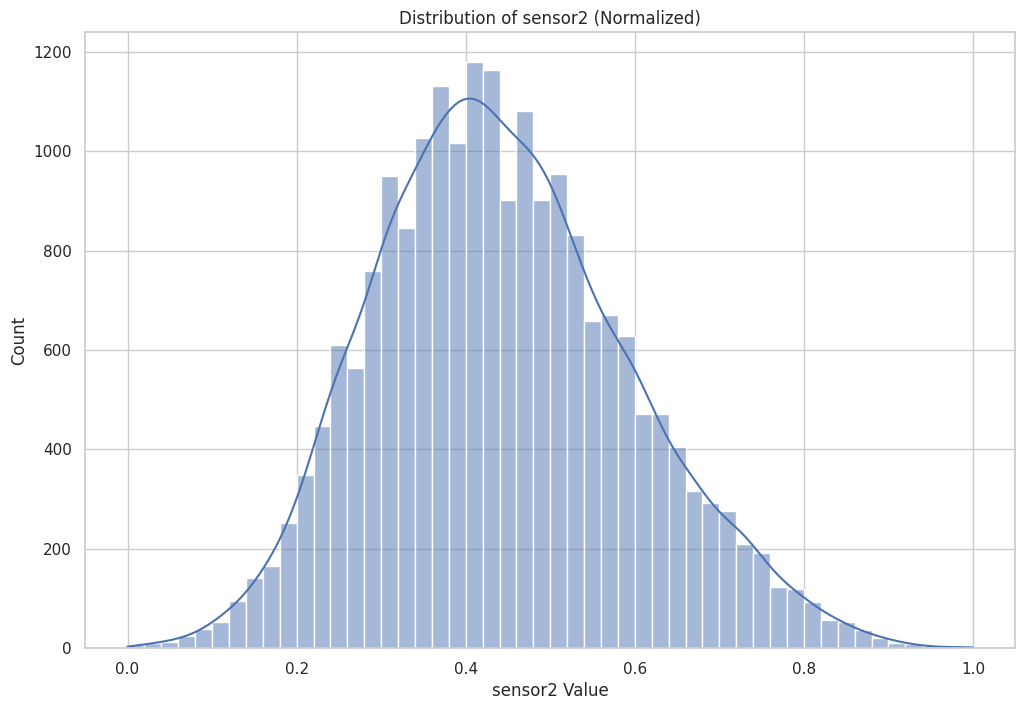

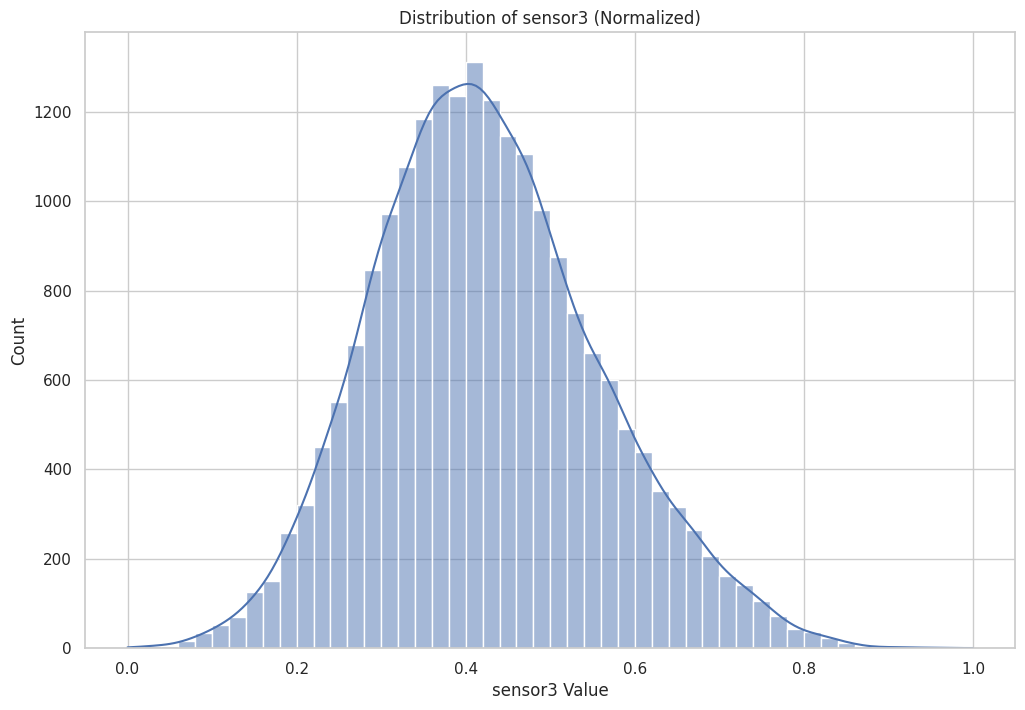

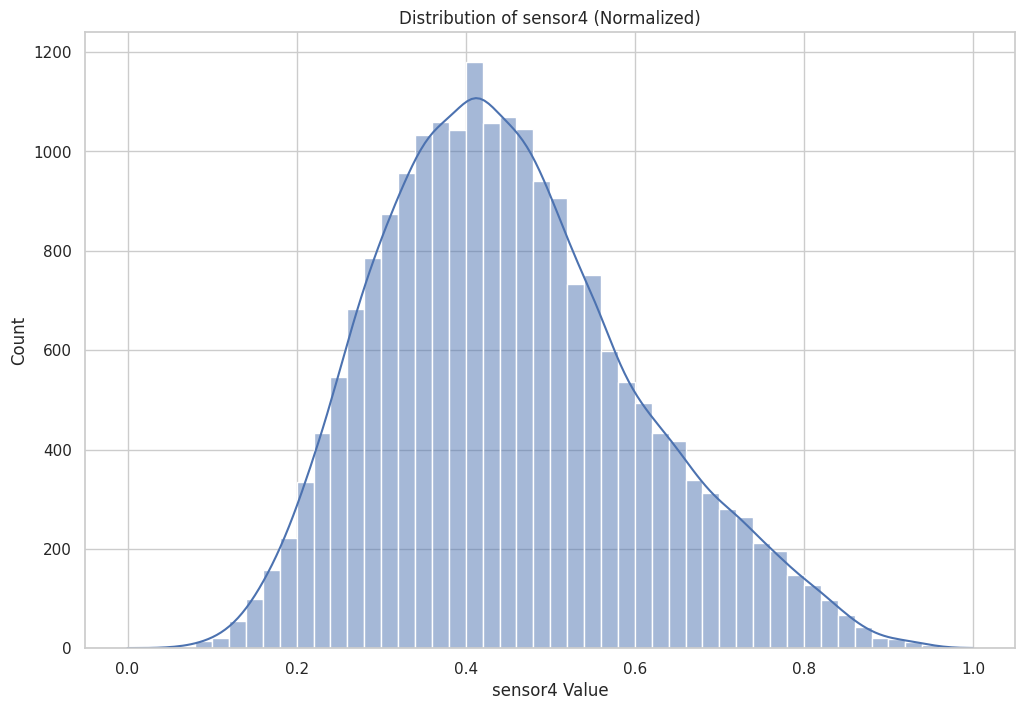

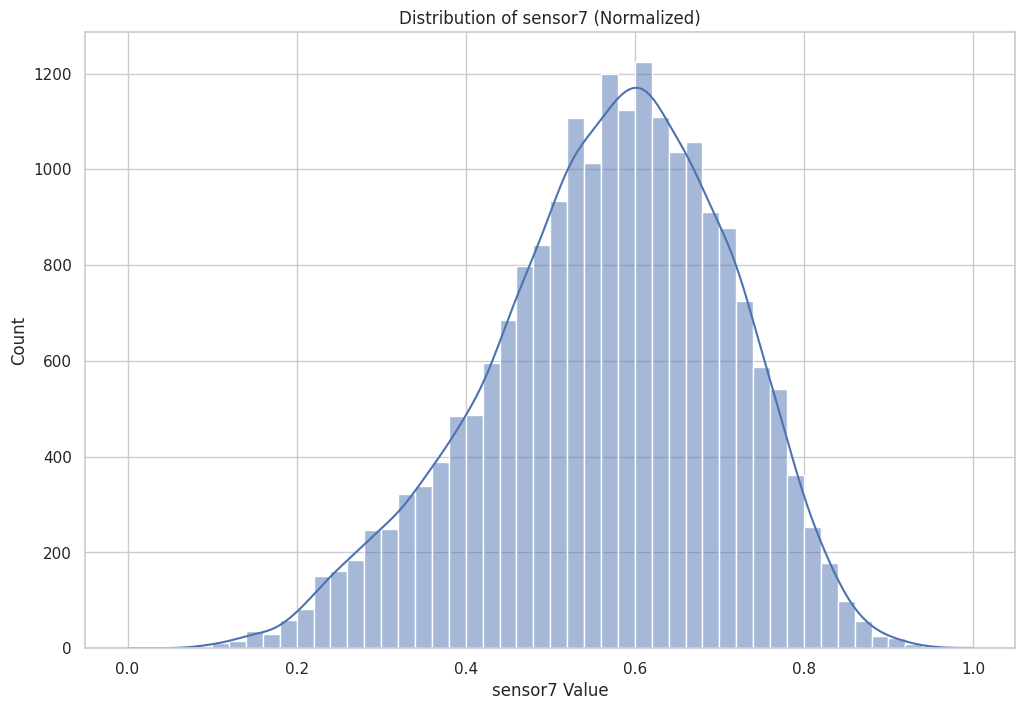

In [23]:
# ---------- 5. Distribution Plots (Histograms and KDE) of Sensors ----------
# Visualize distribution of sensor values after normalization.
for sensor in updated_sensors[:4]:  # visualize for first 4 sensors
    plt.figure()
    sns.histplot(data_FD1[sensor], bins=50, kde=True)
    plt.xlabel(f"{sensor} Value")
    plt.title(f"Distribution of {sensor} (Normalized)")
    plt.show()

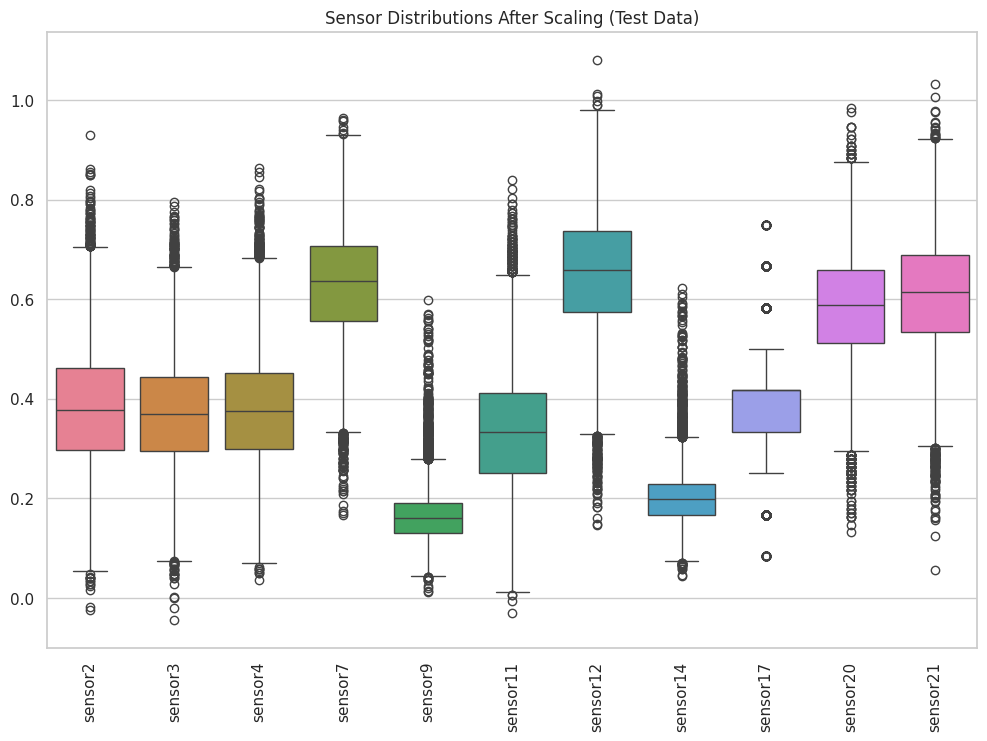

In [24]:
# ---------- 6. Visualizing Test Data Sensor Distributions ----------
plt.figure()
sns.boxplot(data=data_FD1_test[updated_sensors_test])
plt.xticks(rotation=90)
plt.title("Sensor Distributions After Scaling (Test Data)")
plt.show()


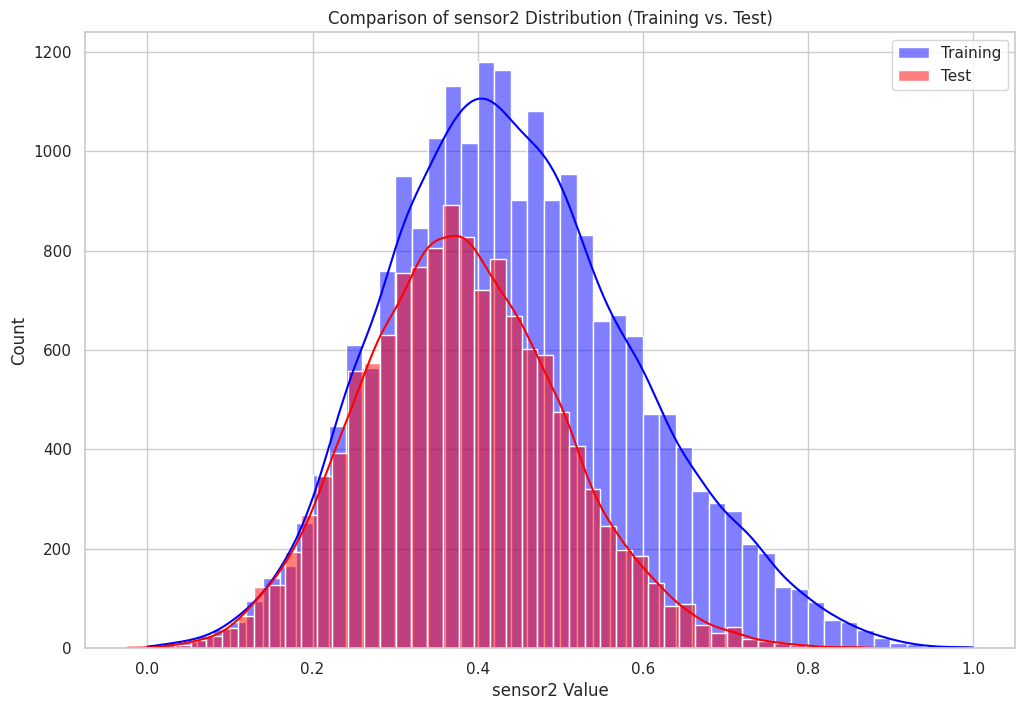

In [25]:
# ---------- 7. Compare Training and Test Sensor Distributions ----------
# Overlay histograms for one sensor to compare training vs. test
sensor_to_compare = updated_sensors[0]  # example: first sensor
plt.figure()
sns.histplot(data_FD1[sensor_to_compare], bins=50, kde=True, color='blue', label='Training', alpha=0.5)
sns.histplot(data_FD1_test[sensor_to_compare], bins=50, kde=True, color='red', label='Test', alpha=0.5)
plt.xlabel(f"{sensor_to_compare} Value")
plt.title(f"Comparison of {sensor_to_compare} Distribution (Training vs. Test)")
plt.legend()
plt.show()

**Outlier Treatment Rationale**

In this analysis, we have chosen not to remove outliers. In the C-MAPSS dataset, what might appear as outlier values often represent important signals associated with engine degradation or abnormal operating conditions. These extreme values can provide crucial information for predictive maintenance models, as they may indicate early signs of failure. Instead of removing them, we rely on robust modeling techniques and thorough exploratory data analysis to understand their impact on our predictions. This approach ensures that we retain all potentially valuable data while still identifying and analyzing any anomalies.